In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

- BenchmarkDotNet=v0.12.0,
- OS=ubuntu 18.04
- Intel Core i5-3230M CPU 2.60GHz (Ivy Bridge), 1 CPU, 4 logical and 2 physical cores
- .NET Core SDK=3.0.102
  [Host]     : .NET Core 3.0.2 (CoreCLR 4.700.19.57202, CoreFX 4.700.19.57708), X64 RyuJIT
 

**Shell sort**

In [290]:
df = pd.read_csv("tests/Bencmarks/BenchmarkDotNet.Artifacts/results/Bencmarks.ShellSortBenchmark-report.csv", usecols = ['Method', 'Mean', 'Error', 'StdDev', 'count'])
df.columns = ['SequenceType', 'Count', 'Mean', 'Error', 'StdDev']
df['Mean'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
df['Error'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
df['StdDev'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
df['Mean'] = df.apply(lambda row : float(row['Mean'][:-3]), axis = 1)
df['Error'] = df.apply(lambda row : float(row['Error'][:-3]), axis = 1)
df['StdDev'] = df.apply(lambda row : float(row['StdDev'][:-3]), axis = 1)
df['SequenceType'] = df.apply(lambda row : row['SequenceType'][9:-8], axis = 1)
df.sort_values(by=['SequenceType'], inplace = True)
df

,SequenceType,Count,Mean,Error,StdDev
1,Hibbard,100,6.763,0.1331,0.2564
4,Hibbard,1000,97.307,0.8421,0.7465
7,Hibbard,10000,1391.421,11.2920,10.5626
2,Knuth,100,5.644,0.0641,0.0600
5,Knuth,1000,87.734,0.9212,0.8167
8,Knuth,10000,1280.105,14.9956,14.0269
0,Shell,100,6.770,0.1345,0.1259
3,Shell,1000,98.900,1.7730,1.5717
6,Shell,10000,1441.595,16.0528,15.0158


In [229]:
knuth = df[df['SequenceType'] == 'Knuth']
shell = df[df['SequenceType'] == 'Shell']
hibbard = df[df['SequenceType'] == 'Hibbard']

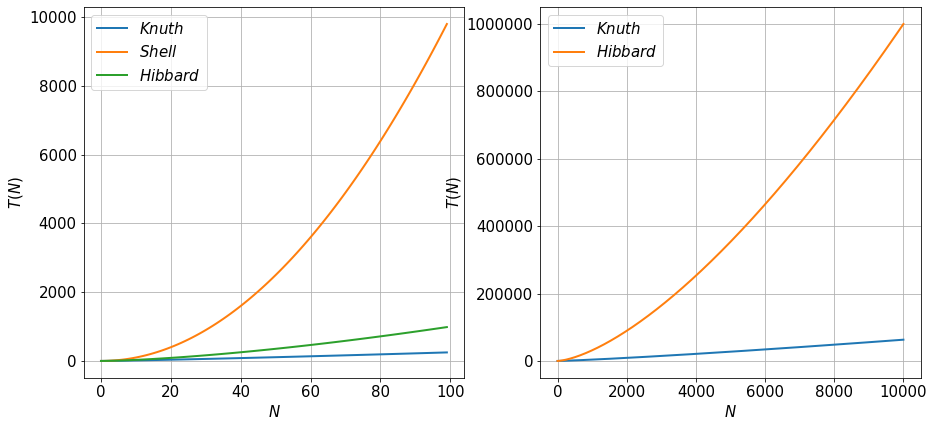

In [230]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.ylabel(r"$T(N)$")
plt.rc('font', size=15)
plt.xlabel("$N$")
plt.grid();

N = np.arange(0, 10**2, 1)
knuthTeor = np.power(N, 6/5)
shellTeor = np.power(N, 2)
hibbardTeor = np.power(N, 3/2)
plt.plot(N, knuthTeor, '-', linewidth = 2, label = r"$Knuth$")
plt.plot(N, shellTeor, '-', linewidth = 2, label = r"$Shell$")
plt.plot(N, hibbardTeor, '-', linewidth = 2, label = r"$Hibbard$")
plt.legend(loc="best");

plt.subplot(2,2,2)
plt.ylabel(r"$T(N)$")
plt.rc('font', size=15)
plt.xlabel("$N$")
plt.grid()

N = np.arange(0, 10**4, 1)
knuthTeor = np.power(N, 6/5)
hibbardTeor = np.power(N, 3/2)
plt.plot(N, knuthTeor, '-', linewidth = 2, label = r"$Knuth$")
plt.plot(N, hibbardTeor, '-', linewidth = 2, label = r"$Hibbard$")
plt.legend(loc="best")


plt.show()

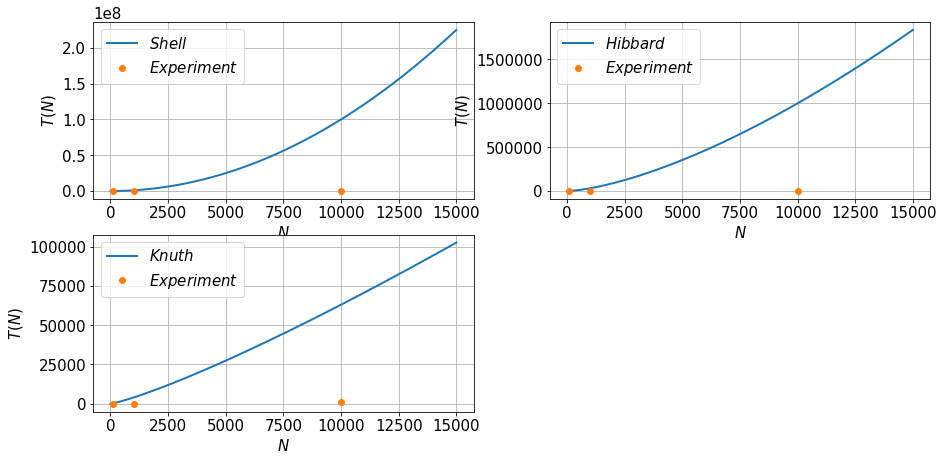

In [338]:
plt.figure(figsize=(15,15))
N = np.arange(0, 1.5 * 10**4, 1)

plt.subplot(4, 2, 1)
plt.ylabel(r"$T(N)$")
plt.rc('font', size=15)
plt.xlabel("$N$")
plt.grid();

shellTeor = np.power(N, 2)
plt.plot(N, shellTeor, '-', linewidth = 2, label = r"$Shell$")
plt.plot(shell['Count'], shell['Mean'], 'o', linewidth=2, label=r'$Experiment$')
plt.legend(loc="best");

plt.subplot(4,2,2)
plt.ylabel(r"$T(N)$")
plt.rc('font', size=15)
plt.xlabel("$N$")
plt.grid()

hibbardTeor = np.power(N, 3/2)
plt.plot(N, hibbardTeor, '-', linewidth = 2, label = r"$Hibbard$")
plt.plot(hibbard['Count'], hibbard['Mean'], 'o', linewidth=2, label=r'$Experiment$')
plt.legend(loc="best")


plt.subplot(4,2,3)
plt.ylabel(r"$T(N)$")
plt.rc('font', size=15)
plt.xlabel("$N$")
plt.grid()


knuthTeor = np.power(N, 6/5)
plt.plot(N, knuthTeor, '-', linewidth = 2, label = r"$Knuth$")
plt.plot(knuth['Count'], knuth['Mean'], 'o', linewidth=2, label=r'$Experiment$')
plt.legend(loc="best")

plt.show()

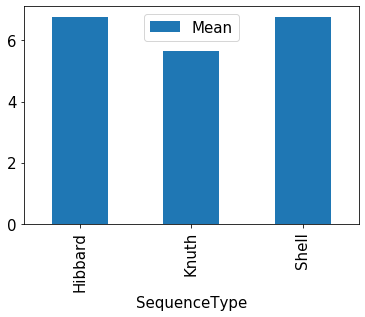

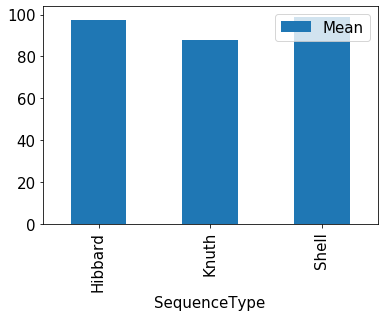

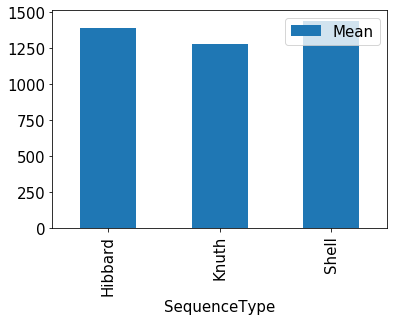

In [340]:
df.groupby(['Count']).plot.bar(x = 'SequenceType', y = 'Mean');

In [232]:
print(hibbardTeor[hibbard['Count']] / hibbard.Mean)

1    147.863374
4    324.979463
7    718.689742
Name: Mean, dtype: float64


In [233]:
print(knuthTeor[knuth['Count']] / knuth.Mean)

2    44.505429
5    45.376612
8    49.289499
Name: Mean, dtype: float64


In [234]:
print(shellTeor[shell['Count']] / shell.Mean)

0     1477.104874
3    10111.223458
6    69367.610182
Name: Mean, dtype: float64


In [344]:
df['C'] = np.array([750, 14109, 187838, 770, 14631, 186945, 858, 13434, 229292])
df['M'] = np.array([314, 6653, 78707, 362, 7560, 80000, 404, 5931, 114211])
df

,SequenceType,Count,Mean,Error,StdDev,C,M
1,Hibbard,100,6.763,0.1331,0.2564,750,314
4,Hibbard,1000,97.307,0.8421,0.7465,14109,6653
7,Hibbard,10000,1391.421,11.2920,10.5626,187838,78707
2,Knuth,100,5.644,0.0641,0.0600,770,362
5,Knuth,1000,87.734,0.9212,0.8167,14631,7560
8,Knuth,10000,1280.105,14.9956,14.0269,186945,80000
0,Shell,100,6.770,0.1345,0.1259,858,404
3,Shell,1000,98.900,1.7730,1.5717,13434,5931
6,Shell,10000,1441.595,16.0528,15.0158,229292,114211


In [348]:
df['CTeor'] = np.floor(df['Count']**(6/5))
df['MTeor'] = np.floor(df['Count']**(6/5))
df

,SequenceType,Count,Mean,Error,StdDev,C,M,CTeor,DTeor,MTeor
1,Hibbard,100,6.763,0.1331,0.2564,750,314,251.0,251.0,251.0
4,Hibbard,1000,97.307,0.8421,0.7465,14109,6653,3981.0,3981.0,3981.0
7,Hibbard,10000,1391.421,11.2920,10.5626,187838,78707,63095.0,63095.0,63095.0
2,Knuth,100,5.644,0.0641,0.0600,770,362,251.0,251.0,251.0
5,Knuth,1000,87.734,0.9212,0.8167,14631,7560,3981.0,3981.0,3981.0
8,Knuth,10000,1280.105,14.9956,14.0269,186945,80000,63095.0,63095.0,63095.0
0,Shell,100,6.770,0.1345,0.1259,858,404,251.0,251.0,251.0
3,Shell,1000,98.900,1.7730,1.5717,13434,5931,3981.0,3981.0,3981.0
6,Shell,10000,1441.595,16.0528,15.0158,229292,114211,63095.0,63095.0,63095.0


In [349]:
df['CRatio'] = df['C'] / df['CTeor']
df['MRatio'] = df['M'] / df['MTeor']
df

,SequenceType,Count,Mean,Error,StdDev,C,M,CTeor,DTeor,MTeor,CRatio,MRatio
1,Hibbard,100,6.763,0.1331,0.2564,750,314,251.0,251.0,251.0,2.988048,1.250996
4,Hibbard,1000,97.307,0.8421,0.7465,14109,6653,3981.0,3981.0,3981.0,3.544084,1.671188
7,Hibbard,10000,1391.421,11.2920,10.5626,187838,78707,63095.0,63095.0,63095.0,2.977066,1.247436
2,Knuth,100,5.644,0.0641,0.0600,770,362,251.0,251.0,251.0,3.067729,1.442231
5,Knuth,1000,87.734,0.9212,0.8167,14631,7560,3981.0,3981.0,3981.0,3.675207,1.899020
8,Knuth,10000,1280.105,14.9956,14.0269,186945,80000,63095.0,63095.0,63095.0,2.962913,1.267929
0,Shell,100,6.770,0.1345,0.1259,858,404,251.0,251.0,251.0,3.418327,1.609562
3,Shell,1000,98.900,1.7730,1.5717,13434,5931,3981.0,3981.0,3981.0,3.374529,1.489827
6,Shell,10000,1441.595,16.0528,15.0158,229292,114211,63095.0,63095.0,63095.0,3.634076,1.810143


**Insertion Sort**

In [350]:
df2 = pd.DataFrame()
df2['Count'] = np.array([100,1000,10000])
df2['C'] = np.array([2529, 245750, 24942713])
df2['M'] = np.array([2437, 245750, 24932719])
df2

,Count,C,M
0,100,2529,2437
1,1000,245750,245750
2,10000,24942713,24932719


In [352]:
df2['CTeor'] = df2['Count']*(df2['Count'] - 1)/2
df2['MTeor'] = df2['Count']*(df2['Count'] - 1)/2
df2

,Count,C,M,CTeor,MTeor
0,100,2529,2437,4950.0,4950.0
1,1000,245750,245750,499500.0,499500.0
2,10000,24942713,24932719,49995000.0,49995000.0


In [354]:
df2['CRatio'] = df2['C'] / df2['CTeor']
df2['MRatio'] = df2['M'] / df2['MTeor']
df2

,Count,C,M,CTeor,MTeor,CRatio,MRatio
0,100,2529,2437,4950.0,4950.0,0.510909,0.492323
1,1000,245750,245750,499500.0,499500.0,0.491992,0.491992
2,10000,24942713,24932719,49995000.0,49995000.0,0.498904,0.498704
